Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential


In [2]:
## If you are using the data by mounting the google drive, use the following :
## from google.colab import drive
## drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [4]:
#root_path = 'gdrive/My Drive/Collab/MelanomaDetectionAssignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/'  #change dir to your project folder


In [5]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("/content/gdrive/My Drive/Collab/MelanomaDetectionAssignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/")
data_dir_test = pathlib.Path('/content/gdrive/My Drive/Collab/MelanomaDetectionAssignment/Skin cancer ISIC The International Skin Imaging Collaboration/Test/')

In [6]:
#from google.colab import files
#files.upload()  #this will prompt you to upload the kaggle.json

In [7]:
print(data_dir_train)

/content/gdrive/My Drive/Collab/MelanomaDetectionAssignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train


In [8]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [9]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [10]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset


In [11]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split= 0.2,
    subset= 'training',
    image_size=(img_height,img_width),
    batch_size = batch_size
)

shape = tf.TensorShape([None,img_height,img_height,3])
print(shape)


val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split= 0.2,
    subset= 'validation',
    image_size=(img_height,img_width),
    batch_size = batch_size
)

print(train_ds)
print(val_ds)


print(tf.keras.utils.image_dataset_from_directory(data_dir_train, labels='inferred'))

Found 2239 files belonging to 9 classes.
Using 1792 files for training.
(None, 180, 180, 3)
Found 2239 files belonging to 9 classes.
Using 447 files for validation.
<BatchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>
<BatchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>
Found 2239 files belonging to 9 classes.
<BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


In [12]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

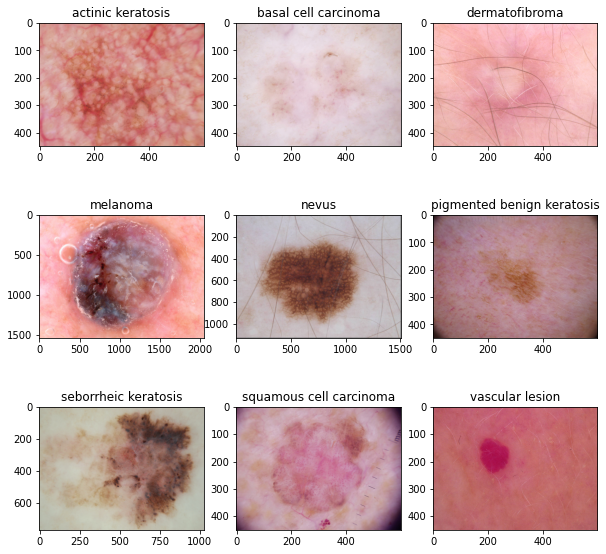

In [13]:
import matplotlib.pyplot as plt

### your code goes here, you can use training or validation data to visualize
plt.figure(figsize=(10,10))
for i in range(9): 
  plt.subplot(3, 3, i + 1)
  image = plt.imread(str(list(data_dir_train.glob(class_names[i]+'/*.jpg'))[1]))
  plt.title(class_names[i])
  plt.imshow(image)


The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [14]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [15]:
### Your code goes here
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
num_classes = 9 
model = Sequential()

model.add(layers.experimental.preprocessing.Rescaling(1./255,input_shape=(180,180,3)))   #Rescaling Layer

#First Convulation layer
model.add(layers.Conv2D(32,kernel_size=(3,3),activation='relu',padding = 'Same'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

#Second Convulation Layer
model.add(layers.Conv2D(64,kernel_size=(3,3),activation='relu',padding = 'Same'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

#Third Convulation Layer
model.add(layers.Conv2D(128,kernel_size=(3,3),activation='relu',padding = 'Same'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

#Dropout layer with 50% Fraction of the input units to drop.
model.add(layers.Dropout(0.3))

#Flatten Layer
##Keras.layers.flatten function flattens the multi-dimensional input tensors into a single dimension.
model.add(layers.Flatten())

#Dense Layer
model.add(layers.Dense(128,activation='relu'))

#Dropout layer with 25% Fraction of the input units to drop.
model.add(layers.Dropout(0.3))

#Dense Layer with softmax activation function.
#Softmax is an activation function that scales numbers/logits into probabilities.
model.add(layers.Dense(len(class_names),activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 128)       7

### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [16]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [17]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 128)       7

### Train the model

In [18]:
epochs = 30
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


56/56 [==============================] - 347s 1s/step - loss: 2.2084 - accuracy: 0.2137 - val_loss: 1.8996 - val_accuracy: 0.3579
Epoch 2/30
56/56 [==============================] - 2s 41ms/step - loss: 1.8763 - accuracy: 0.3069 - val_loss: 1.7373 - val_accuracy: 0.3758
Epoch 3/30
56/56 [==============================] - 2s 40ms/step - loss: 1.7109 - accuracy: 0.3862 - val_loss: 1.5662 - val_accuracy: 0.4743
Epoch 4/30
56/56 [==============================] - 2s 41ms/step - loss: 1.5852 - accuracy: 0.4414 - val_loss: 1.4902 - val_accuracy: 0.4720
Epoch 5/30
56/56 [==============================] - 2s 41ms/step - loss: 1.4524 - accuracy: 0.5017 - val_loss: 1.4572 - val_accuracy: 0.5101
Epoch 6/30
56/56 [==============================] - 2s 41ms/step - loss: 1.4773 - accuracy: 0.4905 - val_loss: 1.5569 - val_accuracy: 0.4720
Epoch 7/30
56/56 [==============================] - 2s 41ms/step - loss: 1.3687 - accuracy: 0.5363 - val_loss: 1.3874 - val_accuracy: 0.5324
Epoch 8/30
56/56 [======

### Visualizing training results

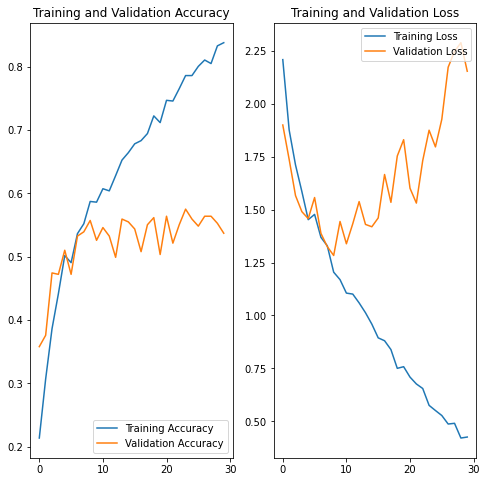

In [19]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

### Write your findings here
Finding on the first base model

The model is overfitting because we can also see difference in loss functions in training & test around the 10-11th epoch

The accuracy is just around 75-80% because there are enough features to remember the pattern.

But again, it's too early to comment on the overfitting & underfitting debate

In [20]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
# Your code goes here
data_augument = keras.Sequential([
                             layers.experimental.preprocessing.RandomFlip(mode="horizontal_and_vertical",input_shape=(img_height,img_width,3)),
                             layers.experimental.preprocessing.RandomRotation(0.2, fill_mode='reflect'),
                             layers.experimental.preprocessing.RandomZoom(height_factor=(0.2, 0.3), width_factor=(0.2, 0.3), fill_mode='reflect')
])

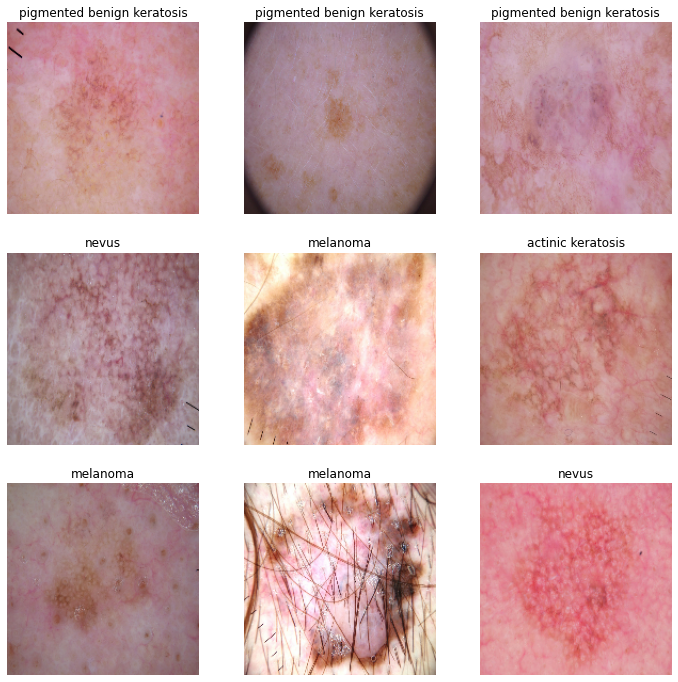

In [21]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here
plt.figure(figsize=(12, 12))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(data_augument(images)[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

### Todo:
### Create the model, compile and train the model


In [22]:
### Your code goes here
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
num_classes = 9 
#model = Sequential()
model = Sequential([ data_augument,
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))
      
])
#model.add(layers.experimental.preprocessing.Rescaling(1./255,input_shape=(180,180,3)))   #Rescaling Layer

#First Convulation layer
model.add(layers.Conv2D(32,kernel_size=(3,3),padding = 'Same',activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

#Second Convulation Layer
model.add(layers.Conv2D(64,kernel_size=(3,3),padding = 'Same',activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

#Third Convulation Layer
model.add(layers.Conv2D(128,kernel_size=(3,3),padding = 'Same',activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

#Dropout layer with 50% Fraction of the input units to drop.
model.add(layers.Dropout(0.3))

#Flatten Layer
##Keras.layers.flatten function flattens the multi-dimensional input tensors into a single dimension.
model.add(layers.Flatten())

#Dense Layer
model.add(layers.Dense(128,activation='relu'))

#Dropout layer with 25% Fraction of the input units to drop.
model.add(layers.Dropout(0.3))

#Dense Layer with softmax activation function.
#Softmax is an activation function that scales numbers/logits into probabilities.
model.add(layers.Dense(len(class_names),activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 180, 180, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 90, 90, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 90, 90, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 45, 45, 64)       0         
 2D)                                                  

## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here
## You can use Dropout layer if there is an evidence of overfitting in your findings
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
num_classes = 9
model = Sequential([ data_augument,
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))
      
])
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (180, 180, 32)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(num_classes, activation = "softmax"))



### Compiling the model

In [23]:
## Your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Training the model

In [24]:
## Your code goes here, note: train your model for 20 epochs
epochs=30
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


56/56 [==============================] - 4s 47ms/step - loss: 2.1528 - accuracy: 0.2411 - val_loss: 1.7801 - val_accuracy: 0.3893
Epoch 2/30
56/56 [==============================] - 2s 44ms/step - loss: 1.7594 - accuracy: 0.3610 - val_loss: 1.6042 - val_accuracy: 0.4295
Epoch 3/30
56/56 [==============================] - 2s 44ms/step - loss: 1.6362 - accuracy: 0.4235 - val_loss: 1.5185 - val_accuracy: 0.4787
Epoch 4/30
56/56 [==============================] - 2s 44ms/step - loss: 1.5911 - accuracy: 0.4475 - val_loss: 1.5703 - val_accuracy: 0.4609
Epoch 5/30
56/56 [==============================] - 2s 44ms/step - loss: 1.4931 - accuracy: 0.4727 - val_loss: 1.4266 - val_accuracy: 0.4787
Epoch 6/30
56/56 [==============================] - 2s 44ms/step - loss: 1.4798 - accuracy: 0.4983 - val_loss: 1.5055 - val_accuracy: 0.4698
Epoch 7/30
56/56 [==============================] - 2s 44ms/step - loss: 1.4438 - accuracy: 0.4994 - val_loss: 1.4085 - val_accuracy: 0.5123
Epoch 8/30
56/56 [======

### Visualizing the results

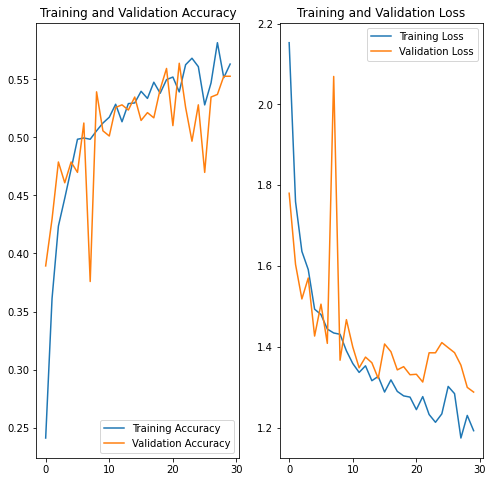

In [25]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?
Finding from Second Model

There is no improvement in accuracy but we can definitely see the overfitting problem has solved due to data augmentation

We can increase the epochs to increase the accuracy so it's too early for judgement

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [26]:
## Your code goes here.
##
path_list=[]
lesion_list=[]
for i in class_names:
      
    for j in data_dir_train.glob(i+'/*.jpg'):
        path_list.append(str(j))
        lesion_list.append(i)
dataframe_dict_original = dict(zip(path_list, lesion_list))
original_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
original_df

,Path,Label
0,/content/gdrive/My Drive/Collab/MelanomaDetect...,actinic keratosis
1,/content/gdrive/My Drive/Collab/MelanomaDetect...,actinic keratosis
2,/content/gdrive/My Drive/Collab/MelanomaDetect...,actinic keratosis
3,/content/gdrive/My Drive/Collab/MelanomaDetect...,actinic keratosis
4,/content/gdrive/My Drive/Collab/MelanomaDetect...,actinic keratosis
...,...,...
2234,/content/gdrive/My Drive/Collab/MelanomaDetect...,vascular lesion
2235,/content/gdrive/My Drive/Collab/MelanomaDetect...,vascular lesion
2236,/content/gdrive/My Drive/Collab/MelanomaDetect...,vascular lesion
2237,/content/gdrive/My Drive/Collab/MelanomaDetect...,vascular lesion


<BarContainer object of 9 artists>

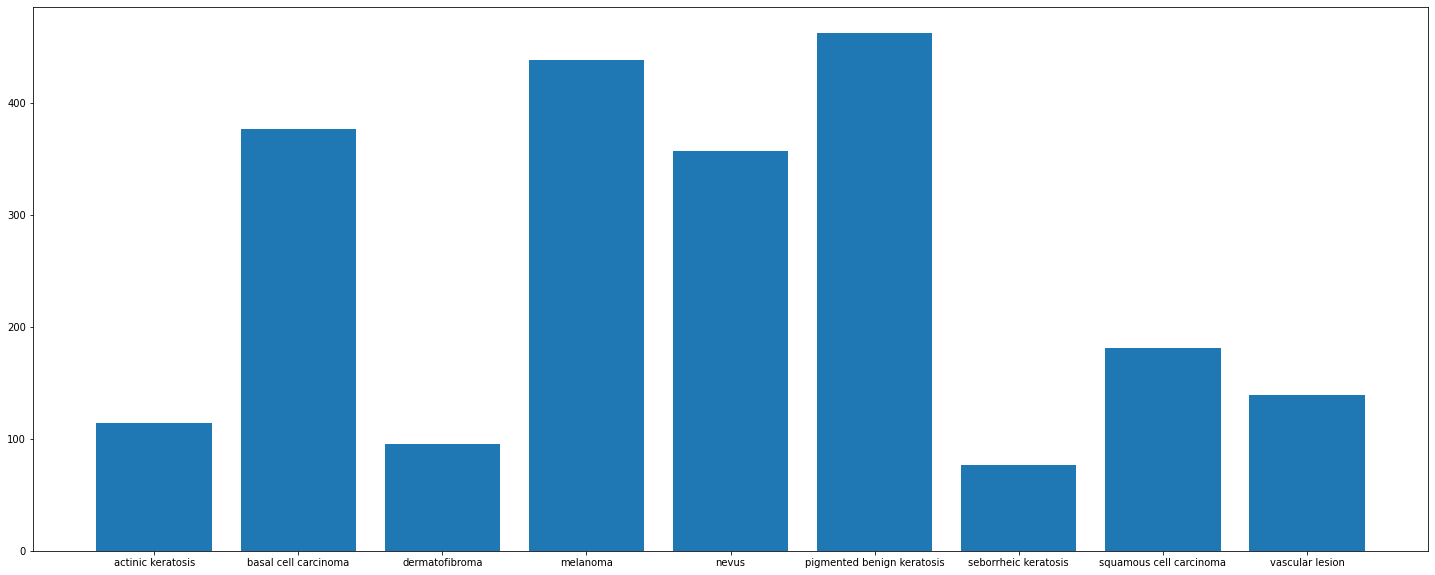

In [27]:
count=[]
for i in class_names:
    count.append(len(list(data_dir_train.glob(i+'/*.jpg'))))
plt.figure(figsize=(25,10))
plt.bar(class_names,count)

#### **Todo:** Write your findings here: 
#### - Which class has the least number of samples?
#### - Which classes dominate the data in terms proportionate number of samples?
Answer-1 :- squamous cell carcinoma has least number of samples

Answer-2:- actinic keratosis and dermatofibroma have proportionate number of classes. melanoma and pigmented benign keratosis have proprtionate number of classes

In [28]:
class_names

['actinic keratosis',
 'basal cell carcinoma',
 'dermatofibroma',
 'melanoma',
 'nevus',
 'pigmented benign keratosis',
 'seborrheic keratosis',
 'squamous cell carcinoma',
 'vascular lesion']

#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [29]:
!pip install Augmentor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [30]:
path_to_training_dataset="/content/gdrive/My Drive/Collab/MelanomaDetectionAssignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset+i ,save_format='jpg')
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(600) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to /content/gdrive/My Drive/Collab/MelanomaDetectionAssignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F00107A4310>: 100%|██████████| 600/600 [00:10<00:00, 55.18 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/gdrive/My Drive/Collab/MelanomaDetectionAssignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F000FC0C650>: 100%|██████████| 600/600 [00:12<00:00, 49.24 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/gdrive/My Drive/Collab/MelanomaDetectionAssignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F00104ACFD0>: 100%|██████████| 600/600 [00:12<00:00, 48.39 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/gdrive/My Drive/Collab/MelanomaDetectionAssignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F0011C2F090>: 100%|██████████| 600/600 [00:51<00:00, 11.72 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/gdrive/My Drive/Collab/MelanomaDetectionAssignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=962x723 at 0x7F001077D110>: 100%|██████████| 600/600 [00:47<00:00, 12.56 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/gdrive/My Drive/Collab/MelanomaDetectionAssignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F00104A2ED0>: 100%|██████████| 600/600 [00:11<00:00, 53.05 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/gdrive/My Drive/Collab/MelanomaDetectionAssignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x7F0011C2F090>: 100%|██████████| 600/600 [00:25<00:00, 23.92 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/gdrive/My Drive/Collab/MelanomaDetectionAssignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F00105167D0>: 100%|██████████| 600/600 [00:10<00:00, 54.93 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/gdrive/My Drive/Collab/MelanomaDetectionAssignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F002A70DE90>: 100%|██████████| 600/600 [00:10<00:00, 54.88 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [31]:
#data_dir_train1 = pathlib.Path("/content/gdrive/My Drive/Collab/MelanomaDetectionAssignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/output/")

image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

5400


### Lets see the distribution of augmented data after adding new images to the original training data.

In [32]:
for i in class_names:
      
    for j in data_dir_train.glob(i+'/output/*.jpg'):
        path_list.append(str(j))
        lesion_list.append(i)
dataframe_dict_original = dict(zip(path_list, lesion_list))
new_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
new_df

,Path,Label
0,/content/gdrive/My Drive/Collab/MelanomaDetect...,actinic keratosis
1,/content/gdrive/My Drive/Collab/MelanomaDetect...,actinic keratosis
2,/content/gdrive/My Drive/Collab/MelanomaDetect...,actinic keratosis
3,/content/gdrive/My Drive/Collab/MelanomaDetect...,actinic keratosis
4,/content/gdrive/My Drive/Collab/MelanomaDetect...,actinic keratosis
...,...,...
7634,/content/gdrive/My Drive/Collab/MelanomaDetect...,vascular lesion
7635,/content/gdrive/My Drive/Collab/MelanomaDetect...,vascular lesion
7636,/content/gdrive/My Drive/Collab/MelanomaDetect...,vascular lesion
7637,/content/gdrive/My Drive/Collab/MelanomaDetect...,vascular lesion


In [33]:
 #[x for x in glob(os.path.join(data_dir_train1, '*', '*.jpg'))]
 #path_list = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
#path_list

In [34]:
#from glob import glob
##path_list = [x for x in glob(os.path.join(data_dir_train2, '*', '*.jpg'))]
#path_list

In [35]:
#lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train2, '*', '*.jpg'))]
#lesion_list_new

In [36]:
#dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [37]:
#df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
#new_df = original_df.append(df2)

In [38]:
new_df['Label'].value_counts()

pigmented benign keratosis    1062
melanoma                      1038
basal cell carcinoma           976
nevus                          957
squamous cell carcinoma        781
vascular lesion                739
actinic keratosis              714
dermatofibroma                 695
seborrheic keratosis           677
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [39]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [40]:
data_dir_train1 = pathlib.Path("/content/gdrive/My Drive/Collab/MelanomaDetectionAssignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/")
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train1,
  seed=123,
  validation_split = 0.2,
  subset = "training",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 7639 files belonging to 9 classes.
Using 6112 files for training.


#### **Todo:** Create a validation dataset

In [41]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train1,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 7639 files belonging to 9 classes.
Using 1527 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [42]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [43]:
model = Sequential()

model.add(layers.experimental.preprocessing.Rescaling(1./255,input_shape=(180,180,3)))   #Rescaling Layer

#First Convulation layer
model.add(layers.Conv2D(32,kernel_size=(3,3),padding = 'Same',activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

#Second Convulation Layer
model.add(layers.Conv2D(64,kernel_size=(3,3),padding = 'Same',activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

#Third Convulation Layer
model.add(layers.Conv2D(128,kernel_size=(3,3),padding = 'Same',activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

#Dropout layer with 50% Fraction of the input units to drop.
model.add(layers.Dropout(0.25))

#Flatten Layer
##Keras.layers.flatten function flattens the multi-dimensional input tensors into a single dimension.
model.add(layers.Flatten())

#Dense Layer
model.add(layers.Dense(128,activation='relu'))

#Dropout layer with 25% Fraction of the input units to drop.
model.add(layers.Dropout(0.25))

#Dense Layer with softmax activation function.
#Softmax is an activation function that scales numbers/logits into probabilities.
model.add(layers.Dense(len(class_names),activation='softmax'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 180, 180, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 90, 90, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 90, 90, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 45, 45, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 45, 45, 128)      

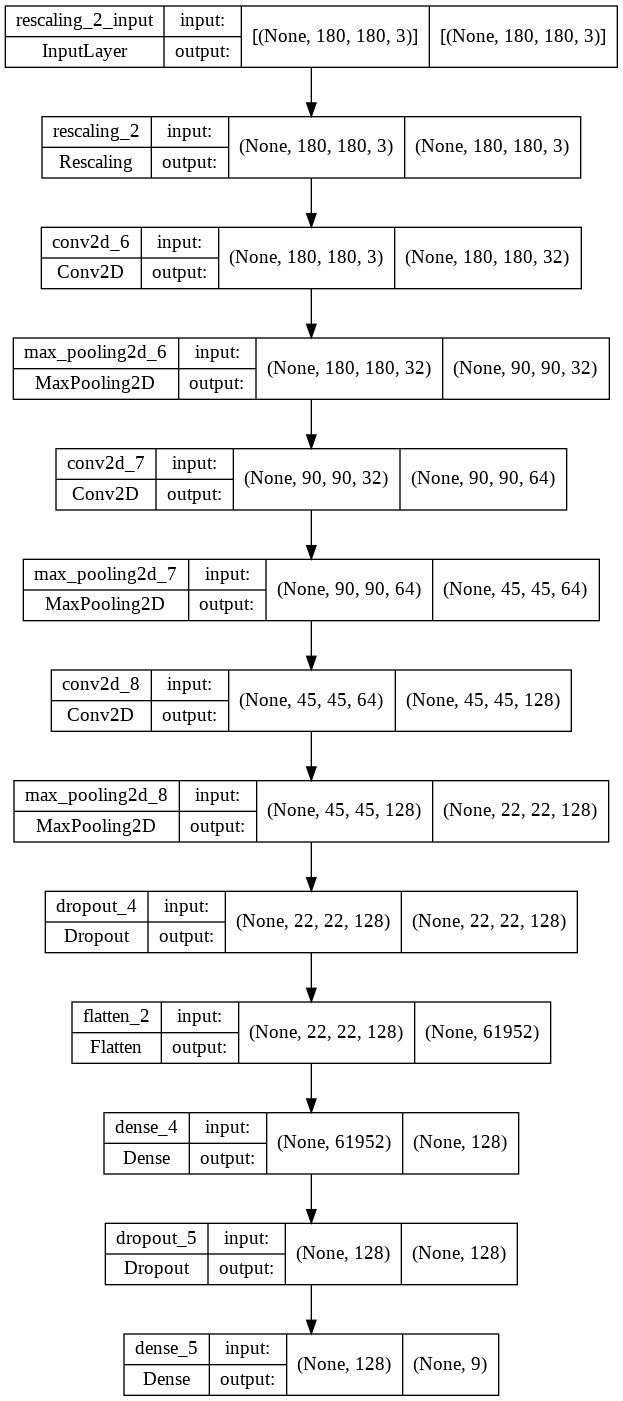

In [44]:
# vizualizing the model 
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

## your code goes here
## You can use Dropout layer if there is an evidence of overfitting in your findings
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
num_classes = 9
model = Sequential([ 
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))
      
])
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (180, 180, 32)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(num_classes, activation = "softmax"))

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [45]:
## your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#### **Todo:**  Train your model

In [46]:
epochs =40
## Your code goes here, use 50 epochs.
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/40


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


191/191 [==============================] - 31s 78ms/step - loss: 2.0051 - accuracy: 0.2273 - val_loss: 1.6784 - val_accuracy: 0.3458
Epoch 2/40
191/191 [==============================] - 8s 41ms/step - loss: 1.5205 - accuracy: 0.4228 - val_loss: 1.3559 - val_accuracy: 0.5043
Epoch 3/40
191/191 [==============================] - 8s 41ms/step - loss: 1.3003 - accuracy: 0.5106 - val_loss: 1.1919 - val_accuracy: 0.5573
Epoch 4/40
191/191 [==============================] - 8s 41ms/step - loss: 1.0909 - accuracy: 0.5990 - val_loss: 0.9909 - val_accuracy: 0.6431
Epoch 5/40
191/191 [==============================] - 8s 41ms/step - loss: 0.9844 - accuracy: 0.6360 - val_loss: 1.0536 - val_accuracy: 0.6051
Epoch 6/40
191/191 [==============================] - 8s 40ms/step - loss: 0.8137 - accuracy: 0.7073 - val_loss: 0.9004 - val_accuracy: 0.6621
Epoch 7/40
191/191 [==============================] - 8s 41ms/step - loss: 0.6606 - accuracy: 0.7595 - val_loss: 0.7300 - val_accuracy: 0.7453
Epoch 8/4

#### **Todo:**  Visualize the model results

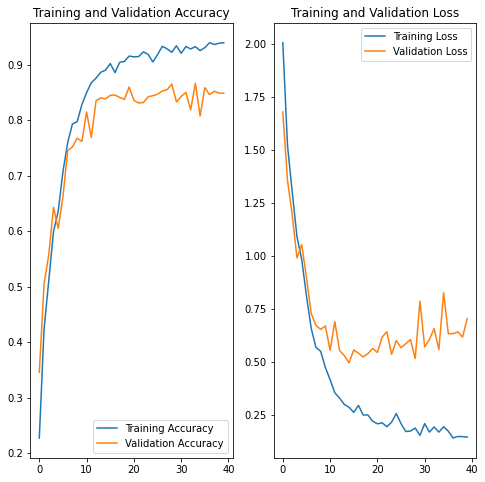

In [47]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



Accuracy on training data has increased by using Augmentor library

Model is still overfitting

The problem of overfitting can be solved by add more layer,neurons or adding dropout layers.

The Model can be further improved by tuning the hyperparameter

In [48]:
data_dir_test = pathlib.Path("/content/gdrive/My Drive/Collab/MelanomaDetectionAssignment/Skin cancer ISIC The International Skin Imaging Collaboration/Test")

image_count_train = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_train)

118


Actual Class actinic keratosis
Predictive Class nevus


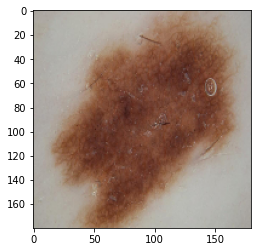

In [49]:
from glob import glob
from tensorflow.keras.preprocessing.image import load_img

Test_image_path = os.path.join(data_dir_test, class_names[0], '*')
Test_image = glob(Test_image_path)

Test_image = load_img(Test_image[0],target_size=(180,180,3))
plt.imshow(Test_image)
plt.grid(False)

img = np.expand_dims(Test_image,axis=0)
pred = model.predict(img)
pred = np.argmax(pred)
pred_class = class_names[pred]
print("Actual Class "+ class_names[0] +'\n'+ "Predictive Class "+pred_class)

In [50]:
print(len(list(data_dir_test.glob('*/*.jpg'))))

118


In [51]:
path_list_test=[]
lesion_list_test=[]
for i in class_names:
      
    for j in data_dir_test.glob(i+'/*.jpg'):
        path_list_test.append(str(j))
        lesion_list_test.append(i)
dataframe_dict_test = dict(zip(path_list_test, lesion_list_test))
new_df_test = pd.DataFrame(list(dataframe_dict_test.items()),columns = ['Path','Label'])
new_df_test

,Path,Label
0,/content/gdrive/My Drive/Collab/MelanomaDetect...,actinic keratosis
1,/content/gdrive/My Drive/Collab/MelanomaDetect...,actinic keratosis
2,/content/gdrive/My Drive/Collab/MelanomaDetect...,actinic keratosis
3,/content/gdrive/My Drive/Collab/MelanomaDetect...,actinic keratosis
4,/content/gdrive/My Drive/Collab/MelanomaDetect...,actinic keratosis
...,...,...
113,/content/gdrive/My Drive/Collab/MelanomaDetect...,squamous cell carcinoma
114,/content/gdrive/My Drive/Collab/MelanomaDetect...,squamous cell carcinoma
115,/content/gdrive/My Drive/Collab/MelanomaDetect...,vascular lesion
116,/content/gdrive/My Drive/Collab/MelanomaDetect...,vascular lesion


In [52]:
new_df_test['Label'].value_counts()

actinic keratosis             16
basal cell carcinoma          16
dermatofibroma                16
melanoma                      16
nevus                         16
pigmented benign keratosis    16
squamous cell carcinoma       16
seborrheic keratosis           3
vascular lesion                3
Name: Label, dtype: int64

0


In [70]:
pred_class_dict = {
    'actinic keratosis':0,
    'basal cell carcinoma':0,
    'dermatofibroma':0,
    'melanoma':0,
    'nevus':0,
    'pigmented benign keratosis':0,
    'squamous cell carcinoma':0,
    'seborrheic keratosis':0,
    'vascular lesion':0
                  }
print(pred_class_dict['dermatofibroma'])
correct=0
incorrect =0
accuracy_test=0


for i in range(len(class_names)):
  print("\n Checking for class_name=  "+class_names[i])
  Test_image_path = os.path.join(data_dir_test, class_names[i], '*')
  for j in range(len(list(data_dir_test.glob(class_names[i]+'*/*.jpg')))):
    print('\nImage No', j+1, 'for class',class_names[i])
    Test_image = glob(Test_image_path)
    Test_image = load_img(Test_image[j],target_size=(180,180,3))   
    # plt.imshow(Test_image)
    # plt.grid(False)

    img = np.expand_dims(Test_image,axis=0)
    pred = model.predict(img)
    pred = np.argmax(pred)
    pred_class = class_names[pred]
    #print("Actual Class "+ class_names[i] +'\n'+ "Predictive Class "+pred_class)
    print("Predicted Class "+pred_class)
    pred_class_dict[pred_class]+=1

    if(class_names[i]==pred_class):
      print("Correct")
      correct = correct+1


    else:
      print("Incorrect")
      incorrect=incorrect+1

print("Total correct predictions = ",correct)
print("Total incorrect predictions = ",incorrect)
accuracy_test = correct/(correct+ incorrect)*100
print("Accuracy on Test images = ",accuracy_test)
print("Classwise predictions: \n",pred_class_dict)

0

 Checking for class_name=  actinic keratosis

Image No 1 for class actinic keratosis
Predicted Class nevus
Incorrect

Image No 2 for class actinic keratosis
Predicted Class nevus
Incorrect

Image No 3 for class actinic keratosis
Predicted Class nevus
Incorrect

Image No 4 for class actinic keratosis
Predicted Class nevus
Incorrect

Image No 5 for class actinic keratosis
Predicted Class nevus
Incorrect

Image No 6 for class actinic keratosis
Predicted Class nevus
Incorrect

Image No 7 for class actinic keratosis
Predicted Class basal cell carcinoma
Incorrect

Image No 8 for class actinic keratosis
Predicted Class melanoma
Incorrect

Image No 9 for class actinic keratosis
Predicted Class nevus
Incorrect

Image No 10 for class actinic keratosis
Predicted Class basal cell carcinoma
Incorrect

Image No 11 for class actinic keratosis
Predicted Class nevus
Incorrect

Image No 12 for class actinic keratosis
Predicted Class nevus
Incorrect

Image No 13 for class actinic keratosis
Predicted C

In [71]:
new_df_test['Label'].value_counts()

actinic keratosis             16
basal cell carcinoma          16
dermatofibroma                16
melanoma                      16
nevus                         16
pigmented benign keratosis    16
squamous cell carcinoma       16
seborrheic keratosis           3
vascular lesion                3
Name: Label, dtype: int64